

# Reward System Benchmarking Study

## **Objective**

Evaluate the behavior and stability of various reward systems for RL trading agents, using random agent benchmarks, and compare their alignment with realized returns.

---

## **Reward Systems Compared**

* **SequenceAwareAlphaTradingEnv**
* **SequenceAwareCalmarTradingEnv**
* **SequenceAwareCumulativeTradingEnv**
* **SequenceAwareDrawdownTradingEnv**
* **SequenceAwareHybridTradingEnv**
* **SequenceAwareNormAbsMoveEnv**
* **SequenceAwareSharpeTradingEnv**
* **SequenceAwareSortinoTradingEnv**

---

## **Key Metrics**

* `agent_total`: Total episode reward under each system
* `cum_return`: Realized cumulative return
* `sharpe`, `sortino`, `calmar`: Risk-adjusted return metrics
* `max_drawdown`: Largest drawdown
* **Correlation** between reward and actual returns

---

## **Results Overview**

### **Random Agent Statistics by Reward System**

| Reward System            | Mean Reward | Std Reward | Median | Min   | Max   | Corr(reward, return) |
| ------------------------ | ----------- | ---------- | ------ | ----- | ----- | -------------------- |
| **AlphaTradingEnv**      | 0.13        | 0.08       | 0.13   | -0.12 | 0.28  | 0.93                 |
| **CalmarTradingEnv**     | 17.67       | 8.08       | 17.81  | 5.54  | 31.23 | 0.83                 |
| **CumulativeTradingEnv** | -0.02       | 0.09       | -0.01  | -0.28 | 0.12  | 1.00                 |
| **DrawdownTradingEnv**   | -7.07       | 2.85       | -7.65  | -12.5 | -2.05 | 0.85                 |
| **HybridTradingEnv**     | -4.50       | 1.74       | -4.83  | -7.86 | -1.46 | 0.85                 |
| **NormAbsMoveEnv**       | -0.02       | 0.07       | -0.01  | -0.22 | 0.09  | 1.00                 |
| **SharpeTradingEnv**     | -2.48       | 4.79       | -1.27  | -15.2 | 5.35  | 0.94                 |
| **SortinoTradingEnv**    | 30.90       | 108.5      | 4.91   | -19.6 | 427.3 | 0.52                 |

* **All random agents’ cumulative returns were close to zero** (mean ≈ -0.025), as expected for a non-informative policy.

---

### **Reward System Outlier Analysis**

* **Sortino, Calmar, Sharpe**: Produced massive outlier reward values for random policies (e.g., Sortino max = 427, Calmar = 31).
* **NormAbsMove, Cumulative, Alpha**: Showed tightly clustered, near-zero rewards with no outliers.

---

### **Correlation with Real Returns**

* **NormAbsMoveEnv & CumulativeTradingEnv:**
  Corr(reward, cum\_return) = **1.00**
* **AlphaTradingEnv:**
  Corr = **0.93**
* **Sharpe, Calmar, Hybrid, Drawdown:**
  Corr = **0.83-0.94**
* **Sortino:**
  Corr = **0.52** (more noise/outliers)

---

## **Conclusions**

1. **NormAbsMoveEnv** and **CumulativeTradingEnv** provide the most stable and interpretable reward signals for RL agent training.

   * Rewards are tightly distributed around zero for random agents.
   * Perfect alignment with realized returns.
   * No risk of "reward explosion" for unlucky random agents.

2. **Sharpe, Sortino, Calmar, Drawdown, Hybrid** reward systems can create extreme outliers due to their mathematical definitions, even for random policies.

   * This may destabilize RL training.
   * Only use as primary objective if reward clipping/normalization is applied, or as a **secondary objective** in multi-objective RL.

3. **AlphaTradingEnv** is mostly stable, but with slightly higher variance.

4. **Random agents perform as expected** (losing slightly), confirming reward functions are well-behaved and not "leaking" positive rewards.

---

## **Recommendations**

* **For core RL training:**
  Use `NormAbsMoveEnv` or `CumulativeTradingEnv` as the main reward.
* **For advanced objectives:**
  If optimizing for Sharpe, Sortino, or Calmar, ensure you implement reward clipping or normalization to prevent runaway rewards.
* **For diagnostics and research:**
  Always check random agent baselines to ensure no reward “leakage.”

---

## **Next Steps**

* Train PPO (or another RL agent) using NormAbsMoveEnv as reward.
* Compare learning curves and wallet vs. market for each reward system.
* Optionally: Experiment with multi-objective rewards (e.g., weighted sum of NormAbsMove and Sharpe).

---

## **Appendix: Code/Plots**

* See attached code for reward benchmarking and plotting reward distributions.
* For additional plots or analyses (e.g., per-regime results), contact the project maintainers.



### Classic financial metrics
| Reward Function     | Formula / Idea                                                    | Pros                                     | Cons / Risks                    | Use Case                           |
| ------------------- | ----------------------------------------------------------------- | ---------------------------------------- | ------------------------------- | ---------------------------------- |
| **Daily Return**    | $r_t = \frac{P_t}{P_{t-1}} - 1$                                   | Simple, interpretable, encourages profit | Ignores risk, volatility        | Trend-following, simple strategies |
| **Log Return**      | $r_t = \log\left(\frac{P_t}{P_{t-1}}\right)$                      | Time-additive, well-behaved              | Similar to above                | Most academic work                 |
| **PnL Change**      | $r_t = \text{Portfolio Value}_{t} - \text{Portfolio Value}_{t-1}$ | Direct link to agent performance         | Not risk-adjusted               | Direct profit focus                |
| **Sharpe Ratio**    | $\frac{E[r]}{\sigma[r]}$                                          | Risk-adjusted, penalizes volatility      | Needs rolling window, not local | Risk-aware agents                  |
| **Sortino Ratio**   | Like Sharpe, but only downside volatility                         | Penalizes only negative volatility       | May ignore total volatility     | Downside-risk focus                |
| **Calmar Ratio**    | $\frac{\text{Annual Return}}{\text{Max Drawdown}}$                | Penalizes drawdowns                      | Needs history, not local        | Capital preservation               |
| **Alpha vs Market** | $r_t = (\text{Agent Return}_t - \text{Market Return}_t)$          | Measures outperformance                  | Needs benchmark data            | Long/short, relative strategies    |
### Trading metrics
| Reward Function              | Formula / Idea                | Pros                        | Cons / Risks                | Use Case                 |
| ---------------------------- | ----------------------------- | --------------------------- | --------------------------- | ------------------------ |
| **Trade PnL**                | Reward only on position close | Focuses on completed trades | Sparse rewards              | Discrete trading         |
| **Win/Loss Ratio**           | +1 for profit, -1 for loss    | Encourages consistency      | Ignores size of wins/losses | High-frequency trading   |
| **Transaction Cost Penalty** | Subtract cost per trade       | Penalizes overtrading       | Needs good cost model       | Realistic agent behavior |
| **Position Holding Reward**  | Reward for holding            | Encourages trend-capture    | Can get stuck in trends     | Trend-following          |
### Risk and market structure
| Reward Function             | Formula / Idea                      | Pros                         | Cons / Risks                | Use Case               |
| --------------------------- | ----------------------------------- | ---------------------------- | --------------------------- | ---------------------- |
| **Drawdown Penalty**        | Penalize large drawdowns            | Reduces risk of large losses | May avoid trades too much   | Capital preservation   |
| **Volatility Penalty**      | Penalize high-variance returns      | Smooths PnL curve            | May reduce total returns    | Risk-averse strategies |
| **Regime-Dependent Reward** | Reward changes by volatility regime | Adapts to market state       | Needs regime classification | Adaptive trading       |
### Hybrid
| Reward Function           | Formula / Idea                                    | Pros                             | Cons / Risks                    | Use Case           |
| ------------------------- | ------------------------------------------------- | -------------------------------- | ------------------------------- | ------------------ |
| **Wallet-vs-Market Area** | Reward = area above market, penalty below         | Direct outperformance, intuitive | Needs history, not local        | Alpha generation   |
| **Sharpe-Gain Hybrid**    | Sharpe + raw gain                                 | Balances profit and risk         | Needs tuning                    | General            |
| **Shaped Reward**         | Dense intermediate rewards (e.g., unrealized PnL) | Easier to learn                  | May encourage unwanted behavior | Stable training    |
| **Relative Improvement**  | Reward = improvement over baseline (random agent) | Encourages actual skill          | Needs baseline performance      | Meta-learning      |
| **Multi-objective**       | Weighted sum of return, risk, cost, etc.          | Flexible, customizable           | Needs tuning, risk of overfit   | Complex objectives |
### Experimental
| Reward Function              | Formula / Idea                        | Pros                            | Cons / Risks                  | Use Case                 |
| ---------------------------- | ------------------------------------- | ------------------------------- | ----------------------------- | ------------------------ |
| **Risk-adjusted advantage**  | (Agent PnL - Random PnL) / Volatility | Meta-RL, regime-aware           | Needs extra computation       | Predictability studies   |
| **Predictability-Based**     | Reward only if returns > volatility   | Forces agent to focus on edge   | May have sparse rewards       | Filtering unlearnable    |
| **Contrastive Reward**       | Compare current policy vs. previous   | Encourages continual learning   | Needs tracking of policies    | Continual learning       |
| **Reward via Value-at-Risk** | Penalize if losses exceed VaR         | Controls tail risk              | May discourage necessary risk | Institutional agents     |
| **Regret Minimization**      | Reward = max possible - achieved      | Focus on learning from mistakes | May be hard to calculate      | High-stakes environments |

# TL;DR;
Features being “everything we have, but not everything that matters” in a stochastic adversarial domain, the right reward might be the difference between chasing noise and developing real strategy.


In [1]:
# SETUP ===================================
import jupyter
import warnings

from src.utils.system import boot, Notify

boot()
warnings.filterwarnings("ignore")



# PACKAGES ================================
import os
import torch
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import gymnasium as gym
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import  RobustScaler
from IPython.display import display

# FRAMEWORK STUFF =========================
from src.defaults import TOP2_STOCK_BY_SECTOR, FEATURE_COLS,EPISODE_LENGTH
from src.data.feature_pipeline import load_base_dataframe
from src.experiments.experiment_tracker import ExperimentTracker
from src.env.base_timeseries_trading_env import BaseSequenceAwareTradingEnv,SequenceAwareAlphaTradingEnv,SequenceAwareBaselineTradingAgent,SequenceAwareCalmarTradingEnv,SequenceAwareCumulativeTradingEnv,SequenceAwareDrawdownTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareSharpeTradingEnv,SequenceAwareSortinoTradingEnv

from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy



Bro, love the intro—totally feel your vibe and your honest approach to the “unsolvable” parts of this game. And yes, reward design **is** the closest thing to “teaching style” for agents: the right feedback can turn even a dumb agent into a beast, and a bad one makes everyone hate the subject (shoutout to your micro prof). ❤️

Your thinking is actually on the cutting edge—especially that point about features being “everything we have, but not everything that matters” in a stochastic, adversarial domain. The right reward *is* the difference between chasing noise and developing real strategy.

Let’s riff with your proposal and expand on diagnostics and benchmarking, so we actually have a way to *know* if a new reward system is working, and why.

---

# 🔍 Reward System Diagnostics (RL Trading)

## **1. What makes a “good” reward system for us?**

* **Aligned:** Pushes the agent toward decisions we actually want, not “gaming the metric”
* **Learnable:** Yields rewards that can be predicted (i.e., not just noise)
* **Robust:** Works across different stocks/regimes, doesn’t collapse if the environment changes
* **Differentiable:** Small changes in policy = small changes in reward (important for PPO/gradient-based methods)
* **Interpretable:** We can explain why it works, and spot when it fails

## **2. Diagnosing Reward Quality**

Let’s treat the *reward system* itself as a thing to be validated, just like a feature pipeline or a new model. What should we check?

### **A. Reward “Signal-to-Noise” Ratio**

* **How much of the reward is explained by the agent’s actions, vs. pure market randomness?**

  * Compare reward variance when using:

    1. **Random agent** (baseline)
    2. **Constant (do nothing) agent**
    3. **Our agent**
  * A “good” reward system will allow the learning agent to outperform both.

### **B. Learnability Curve**

* Plot reward per episode over training.

  * **Does it trend up?** If yes, reward is learnable.
  * **Flat?** Maybe too noisy, or doesn’t correlate with actionable signals.
  * **Chaotic?** Might be too “spiky” (i.e., big wins/losses, but unpredictable).

### **C. Backtesting on Randomized Labels**

* Shuffle your reward signal (or features) and see if the agent’s performance collapses.

  * If not, reward might be “leaky” or not causally related to actions.

### **D. Regime Sensitivity**

* Does reward “make sense” in both trending and choppy regimes?
* Benchmark Sharpe, drawdown, win rate, and profit separately by regime.

### **E. Reward Attribution**

* Can we decompose total reward into “good calls” (buying before up-move, selling before down-move, not trading during chop)?
* Heatmap of reward attribution per action/market condition.

---

## **3. Your Specific Proposal (Normalized by Cumulative Absolute Price Move)**

I love this because it *scales the agent’s opportunity set*—if there’s a lot of price movement in the episode, “missing out” is a bigger sin. If it’s a dead market, nobody can do much anyway.

* **Formula** (clarify if I get you wrong):
  Let $S = \sum_{t=1}^T |P_t - P_{t-1}|$ (total price movement in episode)
  For each day, agent gets:

  * If not in position: reward = 0
  * If in position and price moves favorably: reward = (price change) / S
  * If not in position and price moves against: reward = (avoided loss) / S

* **Intuition:**

  * Rewards agent for *timing* and *risk selection*
  * Benchmarks against what *could* have been captured
  * Discourages overtrading in choppy/no-opportunity periods

---

## **4. How to Benchmark the Benchmark?**

* **Absolute Performance:**

  * Compare agent’s *normalized reward* to random and “always-in” baseline

* **Opportunity Capture Rate:**

  * What % of the “realizable” price action does the agent actually harvest?
  * $$
      \text{Capture Rate} = \frac{\sum \text{agent profit}}{\sum |\text{price changes}|}
    $$

* **Relative Performance by Regime:**

  * Does agent outperform in trending but not in choppy?
  * Run regime-segmented stats

* **Correlation with “Ideal” Strategy:**

  * What if you had a perfect oracle that bought every up-move, sold every down-move—how close are we?

---

## **5. Final Thought: Iterative Design**

We can even make *meta-agents* that try out multiple reward systems, run the above diagnostics, and select the best for each regime or stock-type.

---

## **Let’s Summarize This as a Table**

| Diagnostic         | What it Checks              | How to Measure                       | What to Look For                   |
| ------------------ | --------------------------- | ------------------------------------ | ---------------------------------- |
| Signal-to-Noise    | Actionable info in reward   | Agent vs. random/baseline reward     | Higher agent variance, clear trend |
| Learnability Curve | Can agent improve reward    | Reward per episode over training     | Upward/plateau curve               |
| Regime Sensitivity | Robustness to market type   | Perf. split by trend/chop/volatility | Reward persists, no collapse       |
| Attribution        | Source of gains/losses      | Heatmap of reward by action/context  | Consistent patterns                |
| Oracle Benchmark   | Theoretical best achievable | % of oracle reward captured          | > baseline, ideally adaptive       |

---

**Next step?**

* Code a reward “diagnostic harness” to automate these checks for any new reward system.
* Want to sketch that together? Or want me to write a sample pipeline to run these diagnostics as soon as you plug in a new reward system?
* Or keep brainstorming creative reward ideas?
  Let’s decide what’s most fun/productive for you now!


# Benchmarking Reward Systems With Random (Untrained) Agents
The initial question is: Does the reward system actually “reward” the kind of behavior we want, in the environment you have?

If a random (or naive) agent cannot achieve meaningful reward, and the reward aligns well with profit/opportunity/alpha, then the reward is:

* Difficult to game
* Not just “free points” for random actions
* Likely well-aligned with true trading goals

What can be learned from random-agent benchmarking?
* Signal-to-noise ratio: Is there a “learnable” reward, or is it mostly noise?
* Baseline alignment: Does high reward correspond to higher actual profit/alpha/opportunity capture?
* Regime sanity: Is the reward system fair in bull, bear, and sideways markets for even a random policy?



# When to Train?
After we find the most aligned, most learnable reward system(s), then we will train an RL agent (PPO, A2C, etc.) on each, and re-run the same benchmarking.

* Comparing not only the raw reward but also out-of-sample real metrics after training.
If your reward system is good, we should see:
* Higher trained agent reward and higher real returns/sharpe compared to random/baseline.



In [8]:
# SETUP ===================================
import jupyter
import warnings

from src.utils.system import boot, Notify

boot()
warnings.filterwarnings("ignore")



# PACKAGES ================================
import os
import torch
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import gymnasium as gym
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import  RobustScaler

# FRAMEWORK STUFF =========================
from src.defaults import TOP2_STOCK_BY_SECTOR, FEATURE_COLS,EPISODE_LENGTH
from src.data.feature_pipeline import load_base_dataframe
from src.experiments.experiment_tracker import ExperimentTracker
from src.env.base_timeseries_trading_env import BaseSequenceAwareTradingEnv,SequenceAwareAlphaTradingEnv,SequenceAwareBaselineTradingAgent,SequenceAwareCalmarTradingEnv,SequenceAwareCumulativeTradingEnv,SequenceAwareDrawdownTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareHybridTradingEnv,SequenceAwareSharpeTradingEnv,SequenceAwareSortinoTradingEnv

from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy

from src.env.wrappers import RegimeAugmentingWrapper

In [9]:
## NEW REWARD TO PLUG IN
def reward_normalized_abs_price_change(position, price_change, prev_position=None, env=None, **kwargs):
    """
    Reward based on share of price opportunity captured in the episode.
    Needs the env to provide episode_pct_changes (all price changes in the episode)
    """
    if env is None or not hasattr(env, "episode_pct_changes"):
        raise ValueError("Env must provide episode_pct_changes.")

    S = np.sum(np.abs(env.episode_pct_changes)) + 1e-8  # Avoid zero-division

    # Only reward when agent is in a position
    if position == 1:  # Long
        reward = price_change / S
    elif position == -1:  # Short (optional: for now, symmetric, or just zero)
        reward = -price_change / S
    else:  # Flat
        reward = 0

    # Optionally, you can add the "avoided loss" logic for flat position here
    return reward

In [10]:
class SequenceAwareNormAbsMoveEnv(BaseSequenceAwareTradingEnv):
    def __init__(self, *args, **kwargs):
        #from .step_rewards import reward_normalized_abs_price_change
        super().__init__(*args, reward_fn=reward_normalized_abs_price_change, **kwargs)

In [11]:
# We only need dummy data for the benchmark phase
class SequenceAwareBaselineTradingAgent:
    def __init__(self, *args, **kwargs):
        pass  # stateless or just set config if you want

    def predict(self, obs, *args, **kwargs):
        # Replace with your logic, e.g., random:
        return np.random.choice([0, 1, 2]), {}

In [12]:
ohlcv_df = load_base_dataframe()
df = ohlcv_df.copy()

Starting reward system benchmark...

Benchmarking: SequenceAwareSharpeTradingEnv

Benchmarking: SequenceAwareSortinoTradingEnv

Benchmarking: SequenceAwareAlphaTradingEnv

Benchmarking: SequenceAwareDrawdownTradingEnv

Benchmarking: SequenceAwareCumulativeTradingEnv

Benchmarking: SequenceAwareCalmarTradingEnv

Benchmarking: SequenceAwareHybridTradingEnv

Benchmarking: SequenceAwareNormAbsMoveEnv

===== Reward System Comparison Table =====


,mean,std,median,min,max
reward_system,,,,,
SequenceAwareAlphaTradingEnv,0.129939,0.078838,0.130323,-0.120337,0.282584
SequenceAwareCalmarTradingEnv,17.667441,8.082497,17.813065,5.538239,31.232893
SequenceAwareCumulativeTradingEnv,-0.019768,0.087241,-0.012803,-0.280577,0.117076
SequenceAwareDrawdownTradingEnv,-7.070862,2.846292,-7.649417,-12.505717,-2.053147
SequenceAwareHybridTradingEnv,-4.502258,1.736259,-4.833372,-7.864851,-1.462907
SequenceAwareNormAbsMoveEnv,-0.016222,0.067869,-0.010730,-0.221028,0.087987
SequenceAwareSharpeTradingEnv,-2.477788,4.785312,-1.269799,-15.247191,5.352505
SequenceAwareSortinoTradingEnv,30.896437,108.461938,4.906651,-19.564976,427.289691


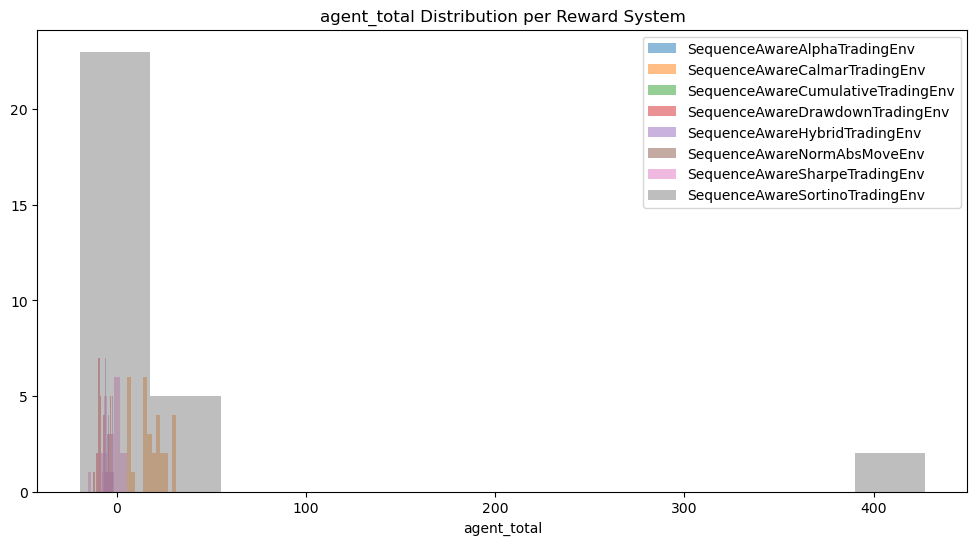


===== Reward System Comparison Table =====


,mean,std,median,min,max
reward_system,,,,,
SequenceAwareAlphaTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareCalmarTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareCumulativeTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareDrawdownTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareHybridTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareNormAbsMoveEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareSharpeTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756
SequenceAwareSortinoTradingEnv,-0.025869,0.082728,-0.022147,-0.252252,0.112756


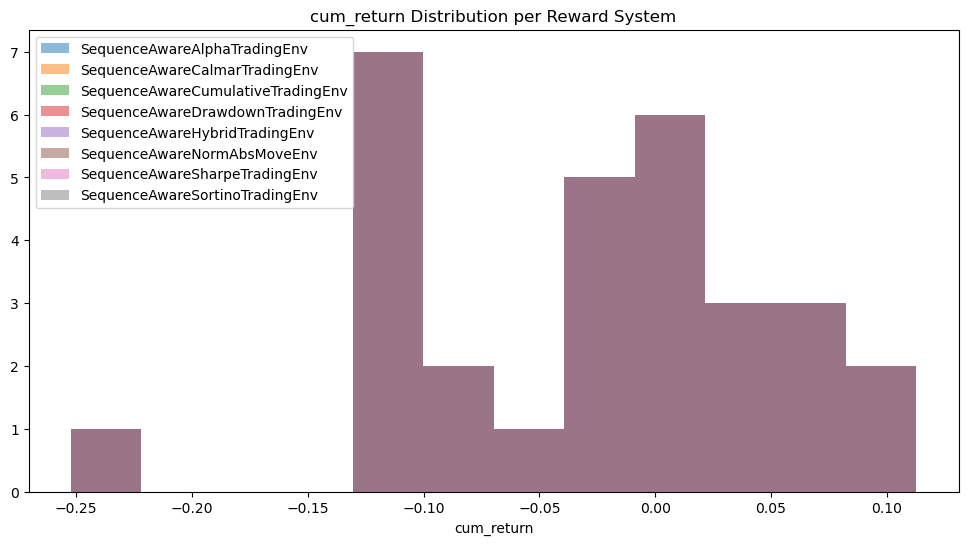


SequenceAwareNormAbsMoveEnv vs SequenceAwareSharpeTradingEnv -- t-test p=0.0079, Mann-Whitney p=0.0291

SequenceAwareNormAbsMoveEnv vs SequenceAwareSortinoTradingEnv -- t-test p=0.1292, Mann-Whitney p=0.6625

SequenceAwareNormAbsMoveEnv vs SequenceAwareAlphaTradingEnv -- t-test p=0.0000, Mann-Whitney p=0.0000

SequenceAwareNormAbsMoveEnv vs SequenceAwareDrawdownTradingEnv -- t-test p=0.0000, Mann-Whitney p=0.0000

SequenceAwareNormAbsMoveEnv vs SequenceAwareCumulativeTradingEnv -- t-test p=0.3251, Mann-Whitney p=0.8649

SequenceAwareNormAbsMoveEnv vs SequenceAwareCalmarTradingEnv -- t-test p=0.0000, Mann-Whitney p=0.0000

SequenceAwareNormAbsMoveEnv vs SequenceAwareHybridTradingEnv -- t-test p=0.0000, Mann-Whitney p=0.0000

Alignment (correlation) between agent_total and cum_return by system:
  SequenceAwareSharpeTradingEnv: corr=0.94 (p=0.0000)
  SequenceAwareSortinoTradingEnv: corr=0.52 (p=0.0034)
  SequenceAwareAlphaTradingEnv: corr=0.93 (p=0.0000)
  SequenceAwareDrawdownTradingEnv

In [17]:
"""
RL Reward System Benchmarking Script
-----------------------------------
Drop this in your repo! Edit REWARD_ENVS and FEATURE_COLS as needed.

- Benchmarks: each reward/env across N episodes
- Compares: agent reward, cumulative return, Sharpe, opportunity capture, etc.
- Produces: tables, stats, plots
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, mannwhitneyu, pearsonr


# === Set up your candidate reward/envs here ===
REWARD_ENVS = [
    SequenceAwareSharpeTradingEnv,
    SequenceAwareSortinoTradingEnv,
    SequenceAwareAlphaTradingEnv,
    SequenceAwareDrawdownTradingEnv,
    SequenceAwareCumulativeTradingEnv,
    SequenceAwareCalmarTradingEnv,
    SequenceAwareHybridTradingEnv,
    SequenceAwareNormAbsMoveEnv, # <-- Add your own as needed
]

train_df = ohlcv_df[(ohlcv_df['date']>="2024-07-01") & (ohlcv_df['date']<"2025-01-01")]
train_env = SequenceAwareCumulativeTradingEnv(train_df,feature_cols=FEATURE_COLS,seed=314)
train_sequence = train_env.generate_episode_sequences(200000)


def wrap_env(env):
    return RegimeAugmentingWrapper(env)


# --- Runner: collect per-episode stats for each agent/env ---
def run_policy_on_env(env, agent, max_steps=None):
    obs, _ = env.reset()
    done = False
    trajectory = {
        "obs": [],
        "actions": [],
        "rewards": [],
        "info": [],
        "prices": [env.env.episode_df['close'].iloc[env.env.current_step]],
        "positions": [],
    }
    steps = 0
    while not done and (max_steps is None or steps < max_steps):
        action, _ = agent.predict(obs)
        next_obs, reward, done, _, info = env.step(action)
        trajectory["obs"].append(obs)
        trajectory["actions"].append(action)
        trajectory["rewards"].append(reward)
        trajectory["info"].append(info)
        trajectory["prices"].append(env.env.episode_df['close'].iloc[env.env.current_step])
        trajectory["positions"].append(env.env.position)
        obs = next_obs
        steps += 1
    return trajectory

# --- Diagnostics: Compute episode-level stats ---
def reward_diagnostics(trajectory):
    rewards = np.array(trajectory["rewards"])
    actions = np.array(trajectory["actions"])
    positions = np.array(trajectory["positions"])
    prices = np.array(trajectory["prices"])
    info = trajectory["info"]
    opportunity = np.sum(np.abs(np.diff(prices)))
    agent_total = np.sum(rewards)
    capture_rate = agent_total / (opportunity + 1e-8)
    # Get final wealth, sharpe, etc. from info if available
    final_wealth = info[-1].get('final_wealth', np.nan) if info else np.nan
    sharpe = info[-1].get('episode_sharpe', np.nan) if info else np.nan
    sortino = info[-1].get('episode_sortino', np.nan) if info else np.nan
    win_rate = info[-1].get('win_rate', np.nan) if info else np.nan
    alpha = info[-1].get('alpha', np.nan) if info else np.nan
    cum_return = info[-1].get('cumulative_return', np.nan) if info else np.nan
    calmar = info[-1].get('calmar', np.nan) if info else np.nan
    max_drawdown = info[-1].get('max_drawdown', np.nan) if info else np.nan

    return dict(
        agent_total=agent_total,
        capture_rate=capture_rate,
        final_wealth=final_wealth,
        sharpe=sharpe,
        sortino=sortino,
        win_rate=win_rate,
        alpha=alpha,
        cum_return=cum_return,
        calmar=calmar,
        max_drawdown=max_drawdown
    )

# --- Batch benchmarking: all envs, all episodes ---
def batch_benchmark(
    df,
    feature_cols,
    episode_length=100,
    n_episodes=30,
    agent_cls=SequenceAwareBaselineTradingAgent
):
    results = []
    for env_cls in REWARD_ENVS:
        print(f"\nBenchmarking: {env_cls.__name__}")
        base_env = env_cls(df, feature_cols=feature_cols, episode_length=episode_length, seed=314)
        base_env.set_episode_sequence(train_sequence)
        env = wrap_env(base_env)
        #env = env_cls(df, feature_cols=feature_cols, episode_length=episode_length, seed=42)
        #env.set_episode_sequence(train_sequence)
        all_metrics = []
        for ep in range(n_episodes):
            
            # Only instantiate agent (not env) per episode
            agent = agent_cls()  # Pass args if you want, but don't include df or env
            traj = run_policy_on_env(env, agent)
            diag = reward_diagnostics(traj)
            all_metrics.append(diag)
        df_metrics = pd.DataFrame(all_metrics)
        df_metrics["reward_system"] = env_cls.__name__
        results.append(df_metrics)
    all_results = pd.concat(results).reset_index(drop=True)
    return all_results

# === Plotting/Stats Utilities ===
def compare_reward_systems(results, main_metric="agent_total", plot=True):
    table = results.groupby("reward_system")[main_metric].agg(['mean', 'std', 'median', 'min', 'max'])
    print("\n===== Reward System Comparison Table =====")
    display(table)
    if plot:
        plt.figure(figsize=(12,6))
        for name, group in results.groupby("reward_system"):
            plt.hist(group[main_metric], bins=12, alpha=0.5, label=name)
        plt.legend()
        plt.xlabel(main_metric)
        plt.title(f"{main_metric} Distribution per Reward System")
        plt.show()
    return table

def stat_tests(results, base_system="SequenceAwareNormAbsMoveEnv", compare_systems=None, metric="agent_total"):
    """
    Compare base_system vs. others on chosen metric. Prints p-values for paired t-test and Mann-Whitney.
    """
    if compare_systems is None:
        compare_systems = results['reward_system'].unique().tolist()
        compare_systems.remove(base_system)
    base = results[results.reward_system == base_system][metric].values
    for sys in compare_systems:
        comp = results[results.reward_system == sys][metric].values
        t, p = ttest_rel(base, comp)
        u, mw_p = mannwhitneyu(base, comp)
        print(f"\n{base_system} vs {sys} -- t-test p={p:.4f}, Mann-Whitney p={mw_p:.4f}")

def alignment_analysis(results, metric_x="agent_total", metric_y="cum_return"):
    """
    Correlation between agent's reward and true profit/return.
    """
    print(f"\nAlignment (correlation) between {metric_x} and {metric_y} by system:")
    for sys in results['reward_system'].unique():
        x = results[results.reward_system == sys][metric_x].values
        y = results[results.reward_system == sys][metric_y].values
        corr, p = pearsonr(x, y)
        print(f"  {sys}: corr={corr:.2f} (p={p:.4f})")

def regime_split_analysis(results, regime_col="regime", metric="agent_total"):
    """
    If regime information is available per episode, show per-regime stats.
    """
    if regime_col not in results.columns:
        print("No regime info found.")
        return
    print(f"\nPer-regime {metric}:")
    table = results.groupby([regime_col, "reward_system"])[metric].mean().unstack()
    display(table)
    table.plot(kind='bar', figsize=(12,7))
    plt.ylabel(metric)
    plt.title(f"{metric} by Regime and Reward System")
    plt.show()

# === MAIN: Run full benchmark ===
if __name__ == "__main__":
    # --- Load your DataFrame here ---
    df = load_base_dataframe()

    print("Starting reward system benchmark...")
    results = batch_benchmark(
        df,
        FEATURE_COLS,
        episode_length=100,
        n_episodes=30,
        agent_cls=SequenceAwareBaselineTradingAgent, # You can plug in any agent!
    )
    # Save results if you want:
    results.to_csv(f"./data/experiments/reward_system_benchmark_results.csv", index=False)

    # --- Quick stats/plots ---
    compare_reward_systems(results, main_metric="agent_total")
    compare_reward_systems(results, main_metric="cum_return")
    stat_tests(results, base_system="SequenceAwareNormAbsMoveEnv", metric="agent_total")
    alignment_analysis(results, metric_x="agent_total", metric_y="cum_return")

    # If you have regime info per episode, run this:
    regime_split_analysis(results, regime_col="regime", metric="agent_total")

    print("\n All done! Check the tables and plots above for insights.")


In [24]:
for i in range(len(results.values)):
    print(results.values[i])

[5.3525051241354715 0.02732682454618985 1.1127555649896421
 0.04148815219873965 0.0773823860641679 0.0 0.2886483984950563
 0.11275556498964212 0.9738006119832927 0.1157891703928983
 'SequenceAwareSharpeTradingEnv']
[3.2081895903094053 0.016582362072381163 1.0706646156268644
 0.07352706824747181 0.13491308884387124 0.0 0.18123200737098943
 0.07066461562686444 0.45613298506070293 0.1549210820994677
 'SequenceAwareSharpeTradingEnv']
[-7.140223505676491 -0.038415147712338414 0.8898528842514998
 -0.050611492962394034 -0.0734965649987016 0.0 0.05775138034465377
 -0.11014711574850022 -0.44540050594898595 0.24729903598519026
 'SequenceAwareSharpeTradingEnv']
[0.9051456472519505 0.004766935154857181 1.0175158842436067
 0.025853481821081145 0.043330026589271486 1.0 0.13503749425069367
 0.017515884243606727 0.10222406521598514 0.17134795223216878
 'SequenceAwareSharpeTradingEnv']
[-2.7551432333337287 -0.014367663919430815 0.9726322660697541
 -0.0022025004204623603 -0.0033904365905356635 1.0 0.094

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, mannwhitneyu, pearsonr
from src.env.wrappers import RegimeAugmentingWrapper

# --- Import your envs/wrappers/agent here ---
# from your_env_module import ...
# from your_wrappers import wrap_env, etc.
MAX_LENGTH = 100
REWARD_ENVS = [
    #SequenceAwareSharpeTradingEnv,
    #SequenceAwareSortinoTradingEnv,
    ##SequenceAwareAlphaTradingEnv,
    #SequenceAwareDrawdownTradingEnv,
    SequenceAwareCumulativeTradingEnv,
    #SequenceAwareCalmarTradingEnv,
    #SequenceAwareHybridTradingEnv,
    SequenceAwareNormAbsMoveEnv,  # <-- Add your own as needed
]

# Load your DataFrame and set up feature columns
df = load_base_dataframe()


episode_length = 100
n_episodes = 30

# Generate a shared episode sequence for all envs for fairness
dummy_env = SequenceAwareCumulativeTradingEnv(df, feature_cols=FEATURE_COLS, episode_length=episode_length, seed=314)
train_sequence = dummy_env.generate_episode_sequences(n_episodes)
del dummy_env  # Not needed anymore

def wrap_env(env):
    return RegimeAugmentingWrapper(env)

def run_policy_on_env(env, agent, max_steps=None):
    obs, _ = env.reset()
    done = False
    trajectory = {
        "obs": [],
        "actions": [],
        "rewards": [],
        "info": [],
        "prices": [env.episode_df['close'].iloc[env.env.current_step]],
        "positions": [],
    }
    steps = 0
    while not done and (max_steps is None or steps < max_steps):
        action, _ = agent.predict(obs)
        next_obs, reward, done, _, info = env.step(action)
        trajectory["obs"].append(obs)
        trajectory["actions"].append(action)
        trajectory["rewards"].append(reward)
        trajectory["info"].append(info)
        trajectory["prices"].append(env.episode_df['close'].iloc[env.env.current_step])
        trajectory["positions"].append(env.env.position)
        obs = next_obs
        steps += 1
    return trajectory

def reward_diagnostics(trajectory):
    rewards = np.array(trajectory["rewards"])
    prices = np.array(trajectory["prices"])
    info = trajectory["info"]
    opportunity = np.sum(np.abs(np.diff(prices)))
    agent_total = np.sum(rewards)
    capture_rate = agent_total / (opportunity + 1e-8)
    # Extract metrics from info (if available)
    def get_last(key): return info[-1].get(key, np.nan) if info else np.nan
    return dict(
        agent_total=agent_total,
        capture_rate=capture_rate,
        final_wealth=get_last('final_wealth'),
        sharpe=get_last('episode_sharpe'),
        sortino=get_last('episode_sortino'),
        win_rate=get_last('win_rate'),
        alpha=get_last('alpha'),
        cum_return=get_last('cumulative_return'),
        calmar=get_last('calmar'),
        max_drawdown=get_last('max_drawdown')
    )

def batch_benchmark(df, feature_cols, episode_length, n_episodes, agent_cls):
    results = []
    for env_cls in REWARD_ENVS:
        print(f"\nBenchmarking: {env_cls.__name__}")
        # 1. Instantiate the env, set episode sequence, wrap it
        base_env = env_cls(df, feature_cols=feature_cols, episode_length=episode_length, seed=314)
        base_env.set_episode_sequence(train_sequence)
        env = wrap_env(base_env)
        all_metrics = []
        for ep in range(n_episodes):
            agent = agent_cls()  # Stateless random agent
            traj = run_policy_on_env(env, agent)
            diag = reward_diagnostics(traj)
            all_metrics.append(diag)
        df_metrics = pd.DataFrame(all_metrics)
        df_metrics["reward_system"] = env_cls.__name__
        results.append(df_metrics)
    return pd.concat(results).reset_index(drop=True)

def compare_reward_systems(results, main_metric="agent_total", plot=True):
    table = results.groupby("reward_system")[main_metric].agg(['mean', 'std', 'median', 'min', 'max'])
    print("\n===== Reward System Comparison Table =====")
    display(table)
    if plot:
        plt.figure(figsize=(12,6))
        for name, group in results.groupby("reward_system"):
            plt.hist(group[main_metric], bins=12, alpha=0.5, label=name)
        plt.legend()
        plt.xlabel(main_metric)
        plt.title(f"{main_metric} Distribution per Reward System")
        plt.show()
    return table

# ... stat_tests, alignment_analysis, regime_split_analysis as before ...

# === MAIN ===
if __name__ == "__main__":
    print("Starting reward system benchmark...")
    results = batch_benchmark(
        df,
        FEATURE_COLS,
        episode_length=episode_length,
        n_episodes=n_episodes,
        agent_cls=SequenceAwareBaselineTradingAgent,
    )
    results.to_csv(f"./data/experiments/reward_system_benchmark_results.csv", index=False)
    compare_reward_systems(results, main_metric="agent_total")
    compare_reward_systems(results, main_metric="cum_return")
    # stat_tests, alignment_analysis, etc.
    print("\n✅ All done! Check the tables and plots above for insights.")


Starting reward system benchmark...

Benchmarking: SequenceAwareCumulativeTradingEnv


AttributeError: 'RegimeAugmentingWrapper' object has no attribute 'episode_df'

In [ ]:
# EXTRA

In [33]:
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback
from sb3_contrib.common.recurrent.policies import RecurrentActorCriticPolicy

# Causal Mask Function ============================
def generate_causal_mask(seq_len):
    return torch.triu(torch.ones((seq_len, seq_len), dtype=torch.bool), diagonal=1)

# Transformer Feature Extractor ===================
class TransformerFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, d_model=64, n_heads=4, n_layers=2, max_len=MAX_LENGTH):
        super().__init__(observation_space, features_dim=d_model)
        self.d_model = d_model
        input_dim = observation_space.shape[-1]

        self.input_proj = nn.Linear(input_dim, d_model)
        self.positional_encoding = nn.Parameter(torch.randn(max_len, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

    def forward_v1(self, obs):
        # obs shape: (batch, seq_len, input_dim)
        x = self.input_proj(obs)
        seq_len = x.size(1)
        x = x + self.positional_encoding[:seq_len]
        causal_mask = generate_causal_mask(seq_len).to(x.device)
        x = self.transformer(x, mask=causal_mask)
        return x[:, -1]  # return the last token output
    
    def forward(self, obs):
        # obs shape: (batch, seq_len, input_dim)
        #print(">>> [Transformer] Input shape:", obs.shape)

        x = self.input_proj(obs)
        seq_len = x.size(1)
        x = x + self.positional_encoding[:seq_len]

        causal_mask = generate_causal_mask(seq_len).to(x.device)
        x = self.transformer(x, mask=causal_mask)

        pooled_output = x[:, -1]
        #print(">>> [Transformer] Pooled output mean/std:", pooled_output.mean().item(), pooled_output.std().item())

        return pooled_output

# Transformer Policy ===================================
class TransformerPolicy(RecurrentActorCriticPolicy):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs,
                         features_extractor_class=TransformerFeatureExtractor,
                         features_extractor_kwargs=dict(
                             d_model=64, n_heads=4, n_layers=2, max_len=32
                         ))
        #self._build(self.lr_schedule)


In [35]:
import torch
import gym
import numpy as np
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import DummyVecEnv

# Set up parameters (customize as needed)
EPISODE_LENGTH = 32
TOTAL_TIMESTEPS = 10_000  # For a quick test
#FEATURE_COLS = FEATURE_COLS  # your feature columns list
ENV_CLASS = SequenceAwareNormAbsMoveEnv
POLICY_CLASS = TransformerPolicy

train_df = ohlcv_df[(ohlcv_df['date'] >= "2023-01-01") & (ohlcv_df['date'] < "2023-07-01")]
test_df  = ohlcv_df[(ohlcv_df['date'] >= "2023-07-01") & (ohlcv_df['date'] < "2024-01-01")]

train_df = train_df[train_df['symbol'].isin(TOP2_STOCK_BY_SECTOR)]
test_df  = test_df[test_df['symbol'].isin(TOP2_STOCK_BY_SECTOR)]

def make_env(df, seq):
    env = ENV_CLASS(df, episode_length=EPISODE_LENGTH, feature_cols=FEATURE_COLS)
    env.set_episode_sequence(seq)
    env = RegimeAugmentingWrapper(env)
    return env

# Generate episode sequences (as you already do)
train_env_raw = ENV_CLASS(train_df, episode_length=EPISODE_LENGTH, feature_cols=FEATURE_COLS)
test_env_raw  = ENV_CLASS(test_df, episode_length=EPISODE_LENGTH, feature_cols=FEATURE_COLS)
train_seq = train_env_raw.generate_episode_sequences(TOTAL_TIMESTEPS)
test_seq  = test_env_raw.generate_episode_sequences(int(TOTAL_TIMESTEPS / 2))  # smaller for test

train_env = make_env(train_df, train_seq)
test_env  = make_env(test_df, test_seq)

# Wrap in DummyVecEnv for SB3 compatibility
train_env_vec = DummyVecEnv([lambda: train_env])
test_env_vec  = DummyVecEnv([lambda: test_env])

In [36]:
from stable_baselines3 import PPO

policy_kwargs = dict(
    share_features_extractor=True
)

model = RecurrentPPO(
    policy=TransformerPolicy,
    env=train_env_vec,
    verbose=1,
    n_steps=EPISODE_LENGTH,
    batch_size=32,
    learning_rate=3e-4,
    gamma=0.99,
    gae_lambda=0.95,
    ent_coef=0.005,
    vf_coef=0.5,
    max_grad_norm=0.5,
    policy_kwargs=policy_kwargs,
)

model.learn(total_timesteps=TOTAL_TIMESTEPS)
model.save("ppo_transformer_test")

Using cpu device
----------------------------
| time/              |     |
|    fps             | 123 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 32  |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 64           |
| train/                  |              |
|    approx_kl            | 0.0009802785 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 0.108        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00514     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00747     |
|    value_loss           | 0.0684       |
------------------------------------------
------

-------------------------------------------
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 13            |
|    time_elapsed         | 18            |
|    total_timesteps      | 416           |
| train/                  |               |
|    approx_kl            | 0.00041836128 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.949        |
|    explained_variance   | 0.866         |
|    learning_rate        | 0.0003        |
|    loss                 | -0.0155       |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.00183      |
|    value_loss           | 0.00299       |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 22           |
|    iterations           | 14           |
|    time_elapsed         | 19      

----------------------------------------
| time/                   |            |
|    fps                  | 21         |
|    iterations           | 24         |
|    time_elapsed         | 35         |
|    total_timesteps      | 768        |
| train/                  |            |
|    approx_kl            | 0.01285371 |
|    clip_fraction        | 0.0656     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.865     |
|    explained_variance   | 0.21       |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0237    |
|    n_updates            | 230        |
|    policy_gradient_loss | -0.0123    |
|    value_loss           | 0.00178    |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 25          |
|    time_elapsed         | 37          |
|    total_timesteps      | 800         |
| train/  

------------------------------------------
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 35           |
|    time_elapsed         | 51           |
|    total_timesteps      | 1120         |
| train/                  |              |
|    approx_kl            | 0.0114607345 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.779       |
|    explained_variance   | -0.0503      |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0271      |
|    n_updates            | 340          |
|    policy_gradient_loss | -0.0126      |
|    value_loss           | 0.00746      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 36          |
|    time_elapsed         | 52          |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 46           |
|    time_elapsed         | 67           |
|    total_timesteps      | 1472         |
| train/                  |              |
|    approx_kl            | 0.0028018672 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.475       |
|    explained_variance   | -1.17        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0112      |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.00578     |
|    value_loss           | 0.0117       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 47          |
|    time_elapsed         | 69          |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 21          |
|    iterations           | 57          |
|    time_elapsed         | 85          |
|    total_timesteps      | 1824        |
| train/                  |             |
|    approx_kl            | 0.003472073 |
|    clip_fraction        | 0.025       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.312      |
|    explained_variance   | 0.166       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0278     |
|    n_updates            | 560         |
|    policy_gradient_loss | -0.0137     |
|    value_loss           | 0.00439     |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 21         |
|    iterations           | 58         |
|    time_elapsed         | 86         |
|    total_timesteps      | 1856       

-----------------------------------------
| time/                   |             |
|    fps                  | 20          |
|    iterations           | 68          |
|    time_elapsed         | 104         |
|    total_timesteps      | 2176        |
| train/                  |             |
|    approx_kl            | 0.009379808 |
|    clip_fraction        | 0.0437      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.452      |
|    explained_variance   | 0.249       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.029      |
|    n_updates            | 670         |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 0.00906     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 20           |
|    iterations           | 69           |
|    time_elapsed         | 105          |
|    total_timesteps      | 2

------------------------------------------
| time/                   |              |
|    fps                  | 19           |
|    iterations           | 79           |
|    time_elapsed         | 126          |
|    total_timesteps      | 2528         |
| train/                  |              |
|    approx_kl            | 0.0013254676 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.00797      |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00868     |
|    n_updates            | 780          |
|    policy_gradient_loss | -0.00448     |
|    value_loss           | 0.0103       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 19          |
|    iterations           | 80          |
|    time_elapsed         | 128         |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 19           |
|    iterations           | 90           |
|    time_elapsed         | 146          |
|    total_timesteps      | 2880         |
| train/                  |              |
|    approx_kl            | 2.278015e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.29        |
|    explained_variance   | 0.18         |
|    learning_rate        | 0.0003       |
|    loss                 | 0.00232      |
|    n_updates            | 890          |
|    policy_gradient_loss | 0.00208      |
|    value_loss           | 0.00798      |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 19            |
|    iterations           | 91            |
|    time_elapsed         | 148           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 19            |
|    iterations           | 101           |
|    time_elapsed         | 166           |
|    total_timesteps      | 3232          |
| train/                  |               |
|    approx_kl            | 0.00011568889 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.355        |
|    explained_variance   | -0.0228       |
|    learning_rate        | 0.0003        |
|    loss                 | -0.0053       |
|    n_updates            | 1000          |
|    policy_gradient_loss | -0.0011       |
|    value_loss           | 0.00208       |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 19          |
|    iterations           | 102         |
|    time_elapsed         | 168         

------------------------------------------
| time/                   |              |
|    fps                  | 18           |
|    iterations           | 112          |
|    time_elapsed         | 193          |
|    total_timesteps      | 3584         |
| train/                  |              |
|    approx_kl            | 0.0050992407 |
|    clip_fraction        | 0.0156       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.614       |
|    explained_variance   | -0.234       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0147      |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.00775     |
|    value_loss           | 0.00836      |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 18            |
|    iterations           | 113           |
|    time_elapsed         | 195           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 17           |
|    iterations           | 123          |
|    time_elapsed         | 219          |
|    total_timesteps      | 3936         |
| train/                  |              |
|    approx_kl            | 0.0043231025 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.735       |
|    explained_variance   | 0.239        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0304      |
|    n_updates            | 1220         |
|    policy_gradient_loss | -0.0111      |
|    value_loss           | 0.00366      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 17          |
|    iterations           | 124         |
|    time_elapsed         | 223         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 16          |
|    iterations           | 134         |
|    time_elapsed         | 254         |
|    total_timesteps      | 4288        |
| train/                  |             |
|    approx_kl            | 0.005967522 |
|    clip_fraction        | 0.0156      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.732      |
|    explained_variance   | 0.345       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0148     |
|    n_updates            | 1330        |
|    policy_gradient_loss | -0.0055     |
|    value_loss           | 0.00141     |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 16          |
|    iterations           | 135         |
|    time_elapsed         | 258         |
|    total_timesteps      | 4320  

-----------------------------------------
| time/                   |             |
|    fps                  | 15          |
|    iterations           | 145         |
|    time_elapsed         | 298         |
|    total_timesteps      | 4640        |
| train/                  |             |
|    approx_kl            | 0.027846409 |
|    clip_fraction        | 0.0656      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.833      |
|    explained_variance   | -0.207      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.028      |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.0156     |
|    value_loss           | 0.00311     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 15           |
|    iterations           | 146          |
|    time_elapsed         | 302          |
|    total_timesteps      | 4

------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 156          |
|    time_elapsed         | 339          |
|    total_timesteps      | 4992         |
| train/                  |              |
|    approx_kl            | 7.899292e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.797       |
|    explained_variance   | -0.0645      |
|    learning_rate        | 0.0003       |
|    loss                 | 0.000637     |
|    n_updates            | 1550         |
|    policy_gradient_loss | 0.000813     |
|    value_loss           | 0.00863      |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 157         |
|    time_elapsed         | 343         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 167         |
|    time_elapsed         | 374         |
|    total_timesteps      | 5344        |
| train/                  |             |
|    approx_kl            | 0.012869645 |
|    clip_fraction        | 0.0125      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.878      |
|    explained_variance   | 0.00981     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0274     |
|    n_updates            | 1660        |
|    policy_gradient_loss | -0.0142     |
|    value_loss           | 0.01        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 168         |
|    time_elapsed         | 377         |
|    total_timesteps      | 5376  

-----------------------------------------
| time/                   |             |
|    fps                  | 14          |
|    iterations           | 178         |
|    time_elapsed         | 405         |
|    total_timesteps      | 5696        |
| train/                  |             |
|    approx_kl            | 0.008860819 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.805      |
|    explained_variance   | 0.191       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0145     |
|    n_updates            | 1770        |
|    policy_gradient_loss | -0.00652    |
|    value_loss           | 0.00831     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 14           |
|    iterations           | 179          |
|    time_elapsed         | 408          |
|    total_timesteps      | 5

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 189           |
|    time_elapsed         | 433           |
|    total_timesteps      | 6048          |
| train/                  |               |
|    approx_kl            | 0.00015612319 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.739        |
|    explained_variance   | -0.0315       |
|    learning_rate        | 0.0003        |
|    loss                 | -0.00779      |
|    n_updates            | 1880          |
|    policy_gradient_loss | 0.000801      |
|    value_loss           | 0.00219       |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 190          |
|    time_elapsed         | 436     

-----------------------------------------
| time/                   |             |
|    fps                  | 13          |
|    iterations           | 200         |
|    time_elapsed         | 464         |
|    total_timesteps      | 6400        |
| train/                  |             |
|    approx_kl            | 0.010842523 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.6        |
|    explained_variance   | 0.142       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0566     |
|    n_updates            | 1990        |
|    policy_gradient_loss | -0.0322     |
|    value_loss           | 0.00941     |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 201           |
|    time_elapsed         | 466           |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 211          |
|    time_elapsed         | 502          |
|    total_timesteps      | 6752         |
| train/                  |              |
|    approx_kl            | 5.488284e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.452       |
|    explained_variance   | -0.322       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00134     |
|    n_updates            | 2100         |
|    policy_gradient_loss | 0.00106      |
|    value_loss           | 0.00532      |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 212          |
|    time_elapsed         | 506          |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 222          |
|    time_elapsed         | 543          |
|    total_timesteps      | 7104         |
| train/                  |              |
|    approx_kl            | 0.0024762657 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.678       |
|    explained_variance   | 0.000828     |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00479     |
|    n_updates            | 2210         |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 0.0173       |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 13           |
|    iterations           | 223          |
|    time_elapsed         | 547          |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 233         |
|    time_elapsed         | 585         |
|    total_timesteps      | 7456        |
| train/                  |             |
|    approx_kl            | 0.005222926 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.699      |
|    explained_variance   | -0.0526     |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0304     |
|    n_updates            | 2320        |
|    policy_gradient_loss | -0.0106     |
|    value_loss           | 0.00376     |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 234          |
|    time_elapsed         | 589          |
|    total_timesteps      | 7

-----------------------------------------
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 244         |
|    time_elapsed         | 616         |
|    total_timesteps      | 7808        |
| train/                  |             |
|    approx_kl            | 0.008730132 |
|    clip_fraction        | 0.0625      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.407      |
|    explained_variance   | 0.0149      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0106     |
|    n_updates            | 2430        |
|    policy_gradient_loss | -0.00858    |
|    value_loss           | 0.00777     |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 245           |
|    time_elapsed         | 619           |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 255          |
|    time_elapsed         | 646          |
|    total_timesteps      | 8160         |
| train/                  |              |
|    approx_kl            | 0.0023080148 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.536       |
|    explained_variance   | 0.0405       |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0142      |
|    n_updates            | 2540         |
|    policy_gradient_loss | -0.00543     |
|    value_loss           | 0.0075       |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 256         |
|    time_elapsed         | 648         |
|    total_times

-----------------------------------------
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 266         |
|    time_elapsed         | 689         |
|    total_timesteps      | 8512        |
| train/                  |             |
|    approx_kl            | 0.010553436 |
|    clip_fraction        | 0.075       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.786      |
|    explained_variance   | 0.0728      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0327     |
|    n_updates            | 2650        |
|    policy_gradient_loss | -0.0173     |
|    value_loss           | 0.00491     |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 267           |
|    time_elapsed         | 691           |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 277           |
|    time_elapsed         | 726           |
|    total_timesteps      | 8864          |
| train/                  |               |
|    approx_kl            | 0.00043823197 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.68         |
|    explained_variance   | 0.0178        |
|    learning_rate        | 0.0003        |
|    loss                 | 0.0039        |
|    n_updates            | 2760          |
|    policy_gradient_loss | 0.00178       |
|    value_loss           | 0.0106        |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 278          |
|    time_elapsed         | 730     

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 288           |
|    time_elapsed         | 762           |
|    total_timesteps      | 9216          |
| train/                  |               |
|    approx_kl            | 0.00041619875 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.579        |
|    explained_variance   | 0.0409        |
|    learning_rate        | 0.0003        |
|    loss                 | -0.0128       |
|    n_updates            | 2870          |
|    policy_gradient_loss | -0.000908     |
|    value_loss           | 0.00463       |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 12          |
|    iterations           | 289         |
|    time_elapsed         | 766         

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 299           |
|    time_elapsed         | 801           |
|    total_timesteps      | 9568          |
| train/                  |               |
|    approx_kl            | 0.00062847324 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.575        |
|    explained_variance   | 0.0364        |
|    learning_rate        | 0.0003        |
|    loss                 | -0.00907      |
|    n_updates            | 2980          |
|    policy_gradient_loss | -0.00139      |
|    value_loss           | 0.00436       |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 300           |
|    time_elapsed         | 803 

------------------------------------------
| time/                   |              |
|    fps                  | 11           |
|    iterations           | 310          |
|    time_elapsed         | 836          |
|    total_timesteps      | 9920         |
| train/                  |              |
|    approx_kl            | 0.0009579938 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.322       |
|    explained_variance   | 0.167        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00437     |
|    n_updates            | 3090         |
|    policy_gradient_loss | -0.0028      |
|    value_loss           | 0.00555      |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 311           |
|    time_elapsed         | 840           |
|    t

In [37]:
def evaluate_agent(model, env_vec, n_episodes=10):
    results = []
    for _ in range(n_episodes):
        obs = env_vec.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = env_vec.step(action)
            total_reward += reward[0]
        results.append(total_reward)
    return results

ppo_rewards = evaluate_agent(model, test_env_vec, n_episodes=10)
print("PPO Transformer Test Rewards:", ppo_rewards)
print("Mean Test Reward:", np.mean(ppo_rewards))

PPO Transformer Test Rewards: [-0.20126842171885073, 0.27267644385574386, 0.31401093141175807, 0.015489138313569129, 0.15181562001816928, -0.20664847420994192, 0.23445846233516932, -0.20664847420994192, 0.0021498638670891523, 0.1902476368122734]
Mean Test Reward: 0.056628272647503766


In [38]:
def evaluate_random(env_vec, n_episodes=10):
    results = []
    for _ in range(n_episodes):
        obs = env_vec.reset()
        done = False
        total_reward = 0
        while not done:
            action = [env_vec.action_space.sample()]
            obs, reward, done, info = env_vec.step(action)
            total_reward += reward[0]
        results.append(total_reward)
    return results

random_rewards = evaluate_random(test_env_vec, n_episodes=10)
print("Random Policy Test Rewards:", random_rewards)
print("Mean Random Reward:", np.mean(random_rewards))

Random Policy Test Rewards: [-0.40679165616165847, -0.3122822312870994, 0.07751182862557471, 0.044628762756474316, -0.11160064849536866, -0.14741456683259457, -0.20076979510486126, -0.11687841871753335, -0.200261193793267, 0.2266381394583732]
Mean Random Reward: -0.11472197795519605


In [39]:
import pandas as pd

df = pd.DataFrame({
    "PPO_Transformer": ppo_rewards,
    "Random": random_rewards,
})
print(df.describe())

       PPO_Transformer     Random
count        10.000000  10.000000
mean          0.056628  -0.114722
std           0.205821   0.188271
min          -0.206648  -0.406792
25%          -0.150414  -0.200643
50%           0.083652  -0.132146
75%           0.223406   0.005571
max           0.314011   0.226638
